<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/2_Oferta_inflation_pi_Phillips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install quandl

#Oferta

O desemprego é uma característica da economia de mercado. Existem pessoas desempregadas que estão procurando trabalho, que devem estar preparadas para trabalhar, mas que não podem receber uma oferta. Isso é desemprego involuntário e reflete o fato de que o mercado de trabalho não está limpo.

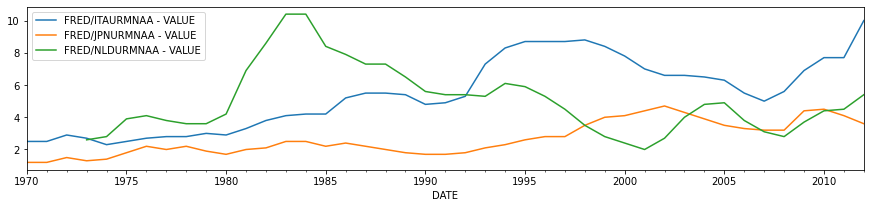

In [ ]:
import quandl
quandl.ApiConfig.api_key = 'Pu37EMDt2nmtD7bZ2FjM'
uk_gov_exp_pgpd = quandl.get(['FRED/ITAURMNAA','FRED/JPNURMNAA','FRED/NLDURMNAA'])
juros_UK = quandl.get("BOE/IUMTLMV")
uk_gov_exp_pgpd.plot(figsize=(15,3))
#Taxa de Desemprego, Japao, Italia, Holanda 

##Oferta (Trabalho e Emprego)

##Inflação (Curva Phillips)



(1) a taxa de inflação defasada (m_1), que fixa a altura da curva de Phillips em uma linha vertical acima do nível do produto associado à taxa de equilíbrio do desemprego; e
(2) a inclinação da curva W S, que fixa sua inclinação.13 As curvas de Phillips serão mais íngremes.
$$
\pi_{t}=\pi_{t-1}+\alpha\left(y_{t}-y_{e}\right)\tag{Curva de Phillips - PC}
$$
Podemos pensar na curva de Phillips como sendo a derivada da inflação em relação ao tempo. Aproximada pelo polinômio de Taylor de ordem 1 e variação do tempo $\Delta=1$. 
$$
\frac{\partial \pi_{t}}{\partial t}=\alpha\left(y_{t}-y_{e}\right).
$$

A inflação pode ser representa pela diferença entre o nível de preço no tempo corrente e o nível de preço no tempo atrasado dividido pelo nível de preço atrasado.
$$
\pi_{t}=\frac{P_t- P_{t-1}}{P_{t-1}}=\frac{\Delta P_t-\Delta P_{t-1}}{P_{t-1}}.
$$

# Inflação de Preços

Seja 
$$
\begin{aligned}
P &= (1+\mu) \frac{W}{\lambda}\\ 
\end{aligned}\tag{1}
$$
Aplicando o logaritmo na igualdade (1),
$$
\begin{aligned}
\log(P) &= \log\left[(1+\mu) \frac{W}{\lambda}\right]\\
\log(P) &= \log(1+\mu) + \log\left[\frac{W}{\lambda}\right]\\
\log(P) &= \log(1+\mu) + \log W - \log\lambda\\ 
\end{aligned}\tag{2}
$$
derivando ambos os lados da equação (2)
$$
\begin{aligned}
\frac{\partial\log(P)}{\partial t} &= \frac{\partial}{\partial t}\log(1+\mu)+\frac{\partial}{\partial t}\log W-\frac{\partial}{\partial t}\log\lambda\\ 
\end{aligned}\tag{3}
$$
Definindo $\frac{\partial}{\partial t}\log(1+\mu)=0$ e usando a regra da cadeia teremos
$$
\begin{aligned}
\frac{\partial\log(P)}{\partial P} \frac{dP}{dt}&=\frac{\partial}{\partial W}\log W\frac{dW}{dt}-\frac{\partial}{\partial \lambda}\log\lambda\frac{d\lambda}{dt}\\ 
\end{aligned}\tag{4}
$$
Definindo
$$
\begin{aligned}
\frac{1}{P} \frac{dP}{dt}&=\frac{1}{W}\frac{dW}{dt}-\frac{1}{\lambda}\frac{d\lambda}{dt}\\ 
\end{aligned}\tag{Inflação de Preços}
$$

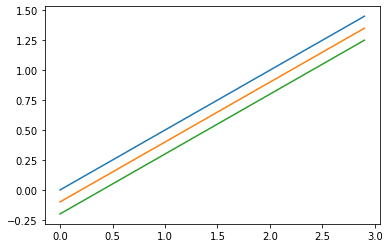

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def PI(y,y0=0, pi0=0,alfa=0.5):
  return pi0 + alfa*(y-y0)

ys = np.arange(0,3,0.1)


plt.plot(ys,PI(ys))
plt.plot(ys,PI(ys,y0=0.2))
plt.plot(ys,PI(ys,y0=0.4))


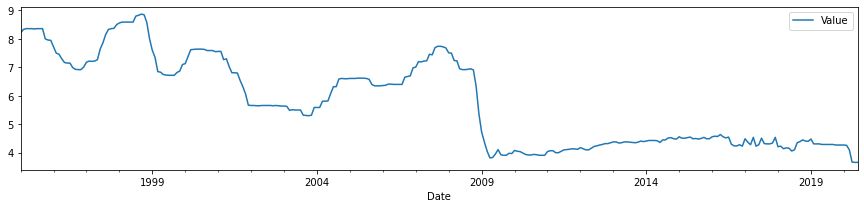

In [ ]:
juros_UK.plot(figsize=(15,3))

In [ ]:
s =juros_UK['Value']
s[:]


Date
1995-01-31    8.21
1995-02-28    8.33
1995-03-31    8.36
1995-04-30    8.36
1995-05-31    8.36
              ... 
2020-02-29    4.26
2020-03-31    4.10
2020-04-30    3.67
2020-05-31    3.66
2020-06-30    3.66
Name: Value, Length: 306, dtype: float64

In [ ]:
r = juros_UK['Value']
n = juros_UK.shape[0]
t       = np.linspace(0, 0, n + 1)
pi      = np.linspace(0, 0, n ) #BOTEI N-1 aqui
y       = np.linspace(0, 0, n + 1)

def IS (r, k=0.2, c0=0.6, a0=1, a1=1, G=10):
  return k*(c0+a0+G) - k*a1*r
y = IS(r)
#
y0 = 0
alpha = 0.1
for i in range(1, n):
  pi[i] = pi[i - 1] + alpha * (y[i] - y0)
pi_aux = juros_UK
pi_aux

,Value
Date,
1995-01-31,8.21
1995-02-28,8.33
1995-03-31,8.36
1995-04-30,8.36
1995-05-31,8.36
...,...
2020-02-29,4.26
2020-03-31,4.10
2020-04-30,3.67


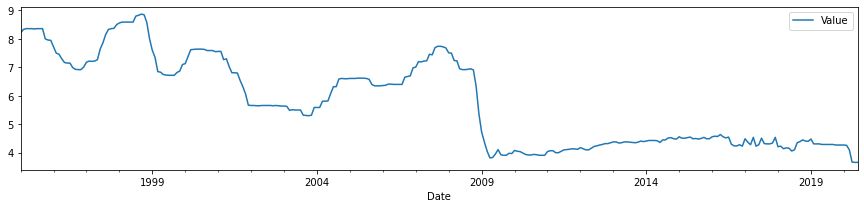

In [ ]:
#print(i.shape)
pi_aux.plot(figsize=(15,3))

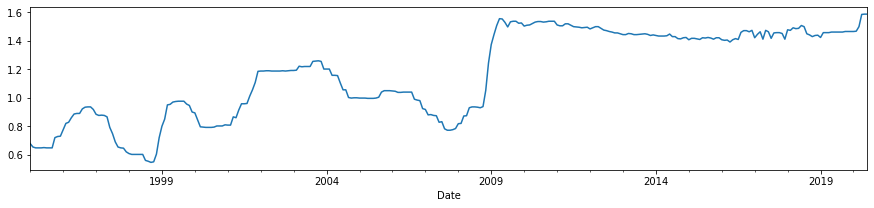

In [ ]:
y.plot(figsize=(15,3))

In [ ]:
#pi.plot(figsize=(15,3))
#teria duas formas de fazer

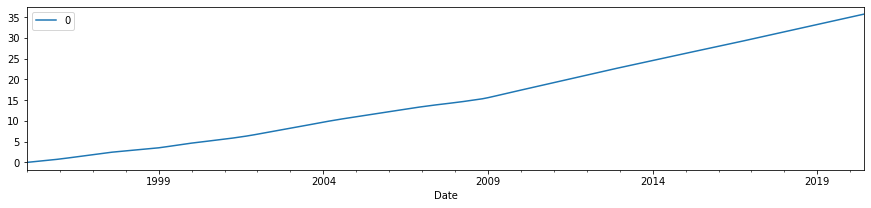

In [ ]:
#1) transformar de DF
import pandas as pd

pi_df = pd.DataFrame(pi) 

pi_df.index = juros_UK.index

pi_df.plot(figsize=(15,3))

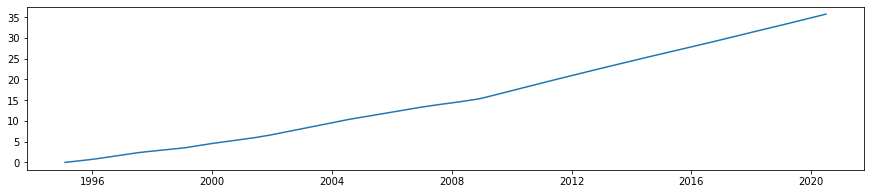

In [ ]:
#2) ou usar a plt direto p plotar passando x e y (to usando frequentemente assim no cap 3)
import matplotlib.pyplot as plt
datas = juros_UK.index
plt.figure(figsize=(15,3))
#x = range(0,len(pi))
plt.plot(datas,pi)
